In [1]:
library(lmerTest)
library(emmeans)
library(ggplot2)
library(lsmeans)

Loading required package: lme4

Loading required package: Matrix

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


The 'lsmeans' package is now basically a front end for 'emmeans'.
Users are encouraged to switch the rest of the way.
See help('transition') for more information, including how to
convert old 'lsmeans' objects and scripts to work with 'emmeans'.



In [2]:
data <- read.csv('/home/kfsh/git/onsetProd/results/stats/lmem_dwemg_paper.csv')
lm <- lmer("Mean_diff ~ Epoch_type + (1|Subject)", data=data)

In [3]:
summary(lm)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: "Mean_diff ~ Epoch_type + (1|Subject)"
   Data: data

REML criterion at convergence: 281155.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.025 -0.031 -0.009  0.033 76.921 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept)  13829   117.6   
 Residual             387734   622.7   
Number of obs: 17899, groups:  Subject, 17

Fixed effects:
               Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)      -2.556     30.021    18.479  -0.085 0.933056    
Epoch_typeemg    78.040     14.512 17530.641   5.378 7.65e-08 ***
Epoch_typesen    41.668     11.377 17895.996   3.662 0.000251 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) Epch_typm
Epoch_typmg -0.197          
Epoch_typsn -0.245  0.522   

In [8]:
em <- emmeans(lm, "Epoch_type", pbkrtest.limit=17406)

ERROR: Error in emmeans(lm, "Epoch_type + (1|Subject)", pbkrtest.limit = 17406): No variable named Epoch_type + (1|Subject) in the reference grid


In [7]:
test(em)

Epoch_type,emmean,SE,df,t.ratio,p.value
click,-1.430966,24.81109,17.94176,-0.05767445,0.95464543
emg,51.498172,25.45385,19.84005,2.02319781,0.05673606
sen,40.266288,24.35938,16.66800,1.65300979,0.11703827


In [4]:
em <- emmeans(lm,pairwise ~ Epoch_type,pbkrtest.limit = 17406)
summary(em)

Note: D.f. calculations have been disabled because the number of observations exceeds 17406.
To enable adjustments, add the argument 'pbkrtest.limit = 17899' (or larger)
[or, globally, 'set emm_options(pbkrtest.limit = 17899)' or larger];
but be warned that this may result in large computation time and memory use.

Note: D.f. calculations have been disabled because the number of observations exceeds 3000.
To enable adjustments, add the argument 'lmerTest.limit = 17899' (or larger)
[or, globally, 'set emm_options(lmerTest.limit = 17899)' or larger];
but be warned that this may result in large computation time and memory use.



Epoch_type,emmean,SE,df,asymp.LCL,asymp.UCL
click,-2.556396,30.02139,Inf,-61.39723,56.28444
emg,75.484017,30.65864,Inf,15.39419,135.57385
sen,39.111240,29.38528,Inf,-18.48285,96.70533
contrast,estimate,SE,df,z.ratio,p.value
click - emg,-78.04041,14.51212,Inf,-5.377601,2.261356e-07
click - sen,-41.66764,11.37749,Inf,-3.662287,7.309615e-04
emg - sen,36.37278,12.94729,Inf,2.809297,1.376010e-02


Saving 6.67 x 6.67 in image



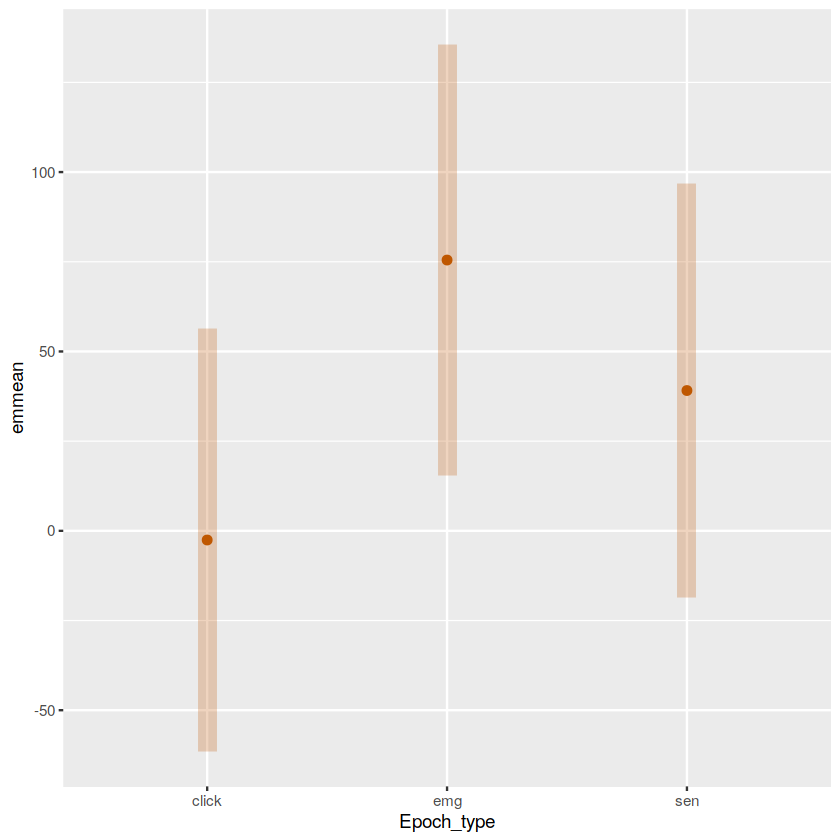

In [5]:
plot(em,by=NULL,horizontal=FALSE,colors='#bf5700')
ggsave('/home/kfsh/git/onsetProd/thesis/figures/pdf/3_cca_lme.pdf')